# changing the event-selection cut that is based on PMT information from our closest-flash to Marco' matched-flash
We suggest to replace the PMT-based cut from the our nominal flash matching,
			to the common flash-matching developed by the CC-inclusive group.
		The reason is better performance of the latter,
		and the desire to publish this work as a part of the cosmic rejection tools developed by MicroBooNE

In [1]:
import sys; 
sys.path.insert(0, '../');
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
pd.set_option('precision', 2)
%matplotlib inline

versions:
{   'OffBeam': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'OnBeam': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'data date': '2018_05_11',
    'date': '2018_05_11',
    'overlay date': '2018_05_11'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.0512441465374 = N(POT on beam)/N(POT MC)


In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/Change_PMT_Cut/Figures/'

In [3]:
versions['overlay date'] = '2018_05_11'
versions['Overlay'] = 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'

In [4]:
OverlayPairsFV,OverlaySamples = load_MCbnbDATAcosmicSamples(date=versions['overlay date'],filename=versions['Overlay']+'_'+versions['overlay date']+'_vertices')
print "%d"%len(OverlaySamples['cosmic'])+' cosmic pairs and %d'%len(OverlaySamples['1mu-1p'])+' mu-p pairs in overlay'

283762 pairs from MC-BNB + cosmic DATA overlay
186485 pairs in FV
49707 are 1mu-1p, 26.7%
41519 are other pairs, 22.3%
95259 are cosmic, 51.1%
--------------------------------------------------------------
23996 are CC 1p 0pi, 12.9%
95259 cosmic pairs and 49707 mu-p pairs in overlay


In [5]:
pairtypes  = ['cosmic' ,'CC 1p 0pi'    ]
labels     = ['Cosmic (data)' ,'CC1p0$\\pi$ (MC)']
colors     = ['red'    ,'blue'         ]
cmaps      = ['Reds'   ,'Blues'        ]
fmts       = ['o'      ,'s']

# Applying a cut on the matched-flash

In [6]:
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples
                                                                   ,cuts_order  = ['no cut','Chi2Proton'] )
pureffOverlay

,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,label,1mu-1p,other pairs,cosmic,CC 1p 0pi
no cut,100.0%,26.7%,100.0%,12.9%,no cut,100.0% (49707),100.0% (41519),100.0% (95259),100.0% (23996)
Chi2Proton,63.1%,70.7%,68.7%,37.1%,Chi2Proton,63.1% (31389),19.3% (8021),5.2% (5001),68.7% (16481)


## for comparison, we first consider the closest-flash and look at the distribution of $N_{PE}$ and the distance to that closest flash

In [7]:
opt = dict(color='black', 
            arrowstyle = 'simple,head_width=.75,head_length=.75',
            connectionstyle = 'arc3,rad=0')

saved/Users/erezcohen/Desktop/Projects/uBoone/write-ups/Change_PMT_Cut/Figures/ClosestFlash_cut.pdf


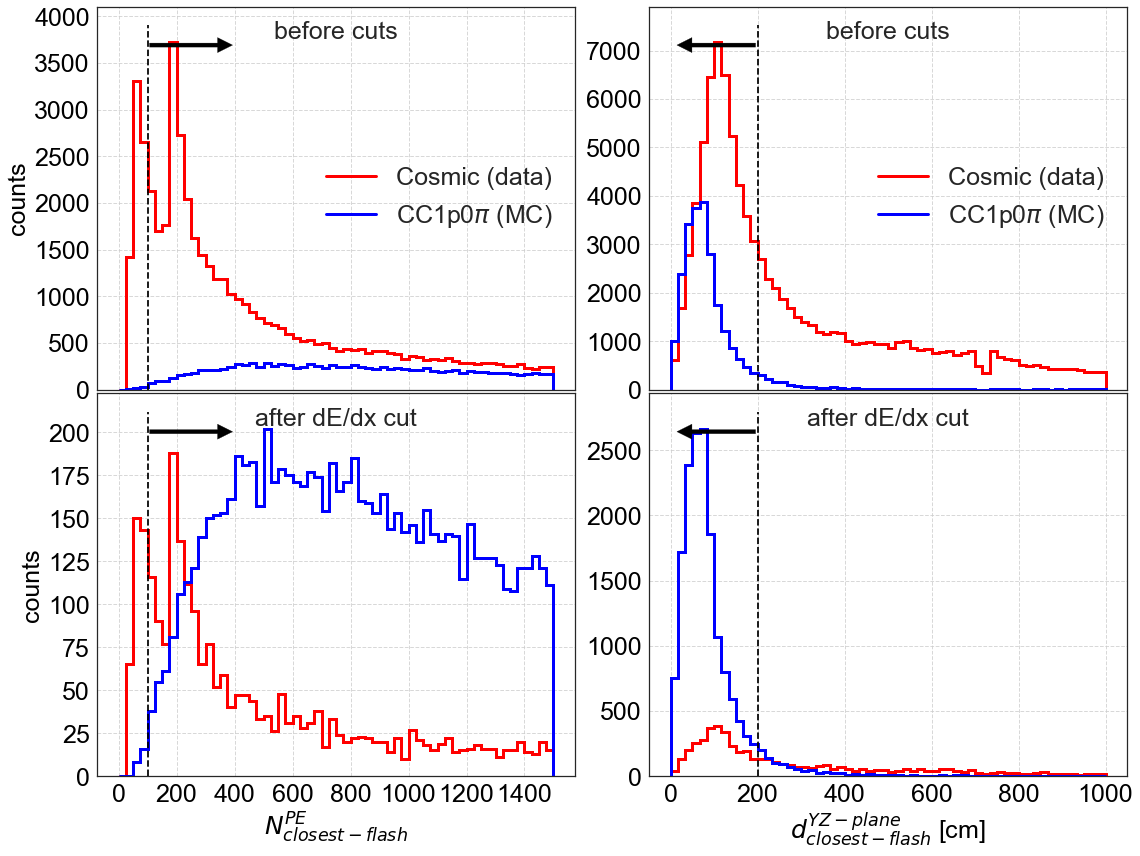

In [8]:
fig = plt.figure(figsize=(16,12))
minPEcut,maxdYZcut = 100, 200
for icut,(cut_name,cut_label) in enumerate(zip(['no cut','Chi2Proton']
                                               ,['before cuts','after dE/dx cut'])):
    for ivar,(var,xlabel,bins,xcut,xcut_arrow) in enumerate(zip(['ClosestFlash_TotalPE','ClosestFlash_YZdistance']
                                                     ,[r'$N_{closest-flash}^{PE}$',r'$d_{closest-flash}^{YZ-plane}$ [cm]']
                                                     ,[linspace(0,1500,61),linspace(0,1000,61)]
                                                     ,[minPEcut,maxdYZcut]
                                                                ,[400,10])):
        ax = fig.add_subplot(2,2,2*icut + ivar+1)
        for isam,(pair_type,slabel,cmap,scolor) in enumerate(zip(pairtypes,labels,cmaps,colors)):
            sam = reducedOverlay[cut_name][pair_type]
            plt.hist(sam[var],histtype='step',color=scolor,linewidth=3,bins=bins)
            plt.plot([0,0],[0,0],color=scolor,linewidth=3,label=slabel)
        ax.set_title(cut_label,y=0.9,fontsize=25)
        set_axes(ax,xlabel if icut>0 else ''
                 ,'counts' if ivar==0 else ''
                 ,remove_ticks_x=True if icut==0 else False
                 ,do_add_grid=True
                 ,do_add_legend=True if icut==0 else False
                 ,legend_loc='center right')
        plt.plot([xcut,xcut],ax.get_ylim(),'--',color='black')
        gca().annotate('',xy=(xcut_arrow, 0.9*np.max(ax.get_ylim()))
                       , xycoords='data',xytext =(xcut, 0.9*np.max(ax.get_ylim()))
                       ,textcoords = 'data',arrowprops=opt,size=20)
plt.tight_layout()
fig.subplots_adjust(hspace=0.01)
filename = figures_path+'ClosestFlash_cut.pdf'
plt.savefig(filename)
print 'saved'+filename

## then we consider the matched-flash and look at the distribution of $N_{PE}$ and the distance to that closest flash, as well as the matching score

saved/Users/erezcohen/Desktop/Projects/uBoone/write-ups/Change_PMT_Cut/Figures/MatchedFlash_cut.pdf


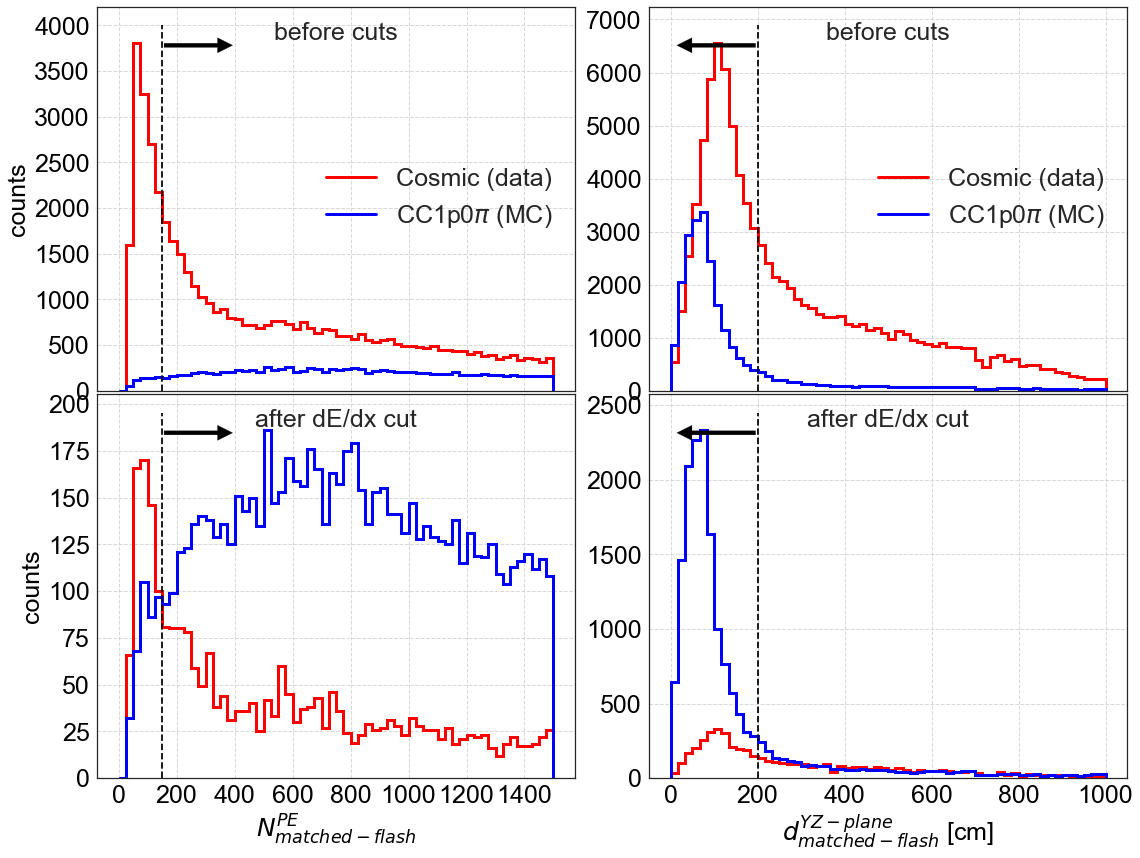

In [9]:
fig = plt.figure(figsize=(16,12))
minPEcut,maxdYZcut,minScoreCut = 150, 200,0
for icut,(cut_name,cut_label) in enumerate(zip(['no cut','Chi2Proton']
                                               ,['before cuts','after dE/dx cut'])):
    for ivar,(var,xlabel,bins,xcut,xcut_arrow) in enumerate(zip(['MatchedFlash_TotalPE','MatchedFlash_YZdistance']
                                                     ,[r'$N_{matched-flash}^{PE}$',r'$d_{matched-flash}^{YZ-plane}$ [cm]']
                                                     ,[linspace(0,1500,61),linspace(0,1000,61)]
                                                     ,[minPEcut,maxdYZcut]
                                                                ,[400,10])):
        ax = fig.add_subplot(2,2,2*icut + ivar+1)
        for isam,(pair_type,slabel,cmap,scolor) in enumerate(zip(pairtypes,labels,cmaps,colors)):
            sam = reducedOverlay[cut_name][pair_type]
            plt.hist(sam[var],histtype='step',color=scolor,linewidth=3,bins=bins)
            plt.plot([0,0],[0,0],color=scolor,linewidth=3,label=slabel)
        ax.set_title(cut_label,y=0.9,fontsize=25)
        set_axes(ax,xlabel if icut>0 else ''
                 ,'counts' if ivar==0 else ''
                 ,remove_ticks_x=True if icut==0 else False
                 ,do_add_grid=True
                 ,do_add_legend=True if icut==0 else False
                 ,legend_loc='center right')
        plt.plot([xcut,xcut],ax.get_ylim(),'--',color='black')
        gca().annotate('',xy=(xcut_arrow, 0.9*np.max(ax.get_ylim()))
                       , xycoords='data',xytext =(xcut, 0.9*np.max(ax.get_ylim()))
                       ,textcoords = 'data',arrowprops=opt,size=20)
plt.tight_layout()
fig.subplots_adjust(hspace=0.01)
filename = figures_path+'MatchedFlash_cut.pdf'
plt.savefig(filename)
print 'saved'+filename

## The impact of replacing the PMT-based cut

In [18]:
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,minPEcut = 100
                                                                   ,cuts_order  = ['no cut','Chi2Proton','ClosestFlash','length','non-collinearity','vertex activity','delta phi','Pt & delta phi'] )
pureffOverlay

,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,label,1mu-1p,other pairs,cosmic,CC 1p 0pi
no cut,100.0%,26.7%,100.0%,12.9%,no cut,100.0% (49707),100.0% (41519),100.0% (95259),100.0% (23996)
Chi2Proton,63.1%,70.7%,68.7%,37.1%,Chi2Proton,63.1% (31389),19.3% (8021),5.2% (5001),68.7% (16481)
ClosestFlash,59.1%,74.5%,64.3%,39.1%,ClosestFlash,59.1% (29400),18.6% (7721),2.5% (2350),64.3% (15420)
length,53.9%,80.4%,59.7%,43.0%,length,53.9% (26806),11.2% (4636),2.0% (1904),59.7% (14327)
non-collinearity,49.2%,85.0%,56.5%,47.1%,non-collinearity,49.2% (24464),8.1% (3379),1.0% (926),56.5% (13550)
vertex activity,35.4%,86.7%,50.2%,59.4%,vertex activity,35.4% (17594),5.3% (2215),0.5% (474),50.2% (12051)
delta phi,23.5%,94.7%,38.2%,74.1%,delta phi,23.5% (11703),1.2% (508),0.2% (151),38.2% (9160)
Pt & delta phi,20.8%,95.8%,34.5%,76.8%,Pt & delta phi,20.8% (10337),0.8% (352),0.1% (99),34.5% (8284)


In [19]:
table = pureffOverlay[[ u'cosmic',u'CC 1p 0pi',u'CC$0\pi 1 p$ pur.']]
print 
print "\hline \hline"
for i,row in table.iterrows(): 
    print "%s"%i + " & " + row[u'cosmic'] + " & " + row[u'CC 1p 0pi'] + " & "  +row[u'CC$0\pi 1 p$ pur.']+ "\\tabularnewline"
    print "\hline"


\hline \hline
no cut & 100.0% (95259) & 100.0% (23996) & 12.9%\tabularnewline
\hline
Chi2Proton & 5.2% (5001) & 68.7% (16481) & 37.1%\tabularnewline
\hline
ClosestFlash & 2.5% (2350) & 64.3% (15420) & 39.1%\tabularnewline
\hline
length & 2.0% (1904) & 59.7% (14327) & 43.0%\tabularnewline
\hline
non-collinearity & 1.0% (926) & 56.5% (13550) & 47.1%\tabularnewline
\hline
vertex activity & 0.5% (474) & 50.2% (12051) & 59.4%\tabularnewline
\hline
delta phi & 0.2% (151) & 38.2% (9160) & 74.1%\tabularnewline
\hline
Pt & delta phi & 0.1% (99) & 34.5% (8284) & 76.8%\tabularnewline
\hline


In [16]:
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,minPEcut = 150
                                                                   ,cuts_order  = ['no cut','Chi2Proton','MatchedFlash','length','non-collinearity','vertex activity','delta phi','Pt & delta phi'] )
pureffOverlay

,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,label,1mu-1p,other pairs,cosmic,CC 1p 0pi
no cut,100.0%,26.7%,100.0%,12.9%,no cut,100.0% (49707),100.0% (41519),100.0% (95259),100.0% (23996)
Chi2Proton,63.1%,70.7%,68.7%,37.1%,Chi2Proton,63.1% (31389),19.3% (8021),5.2% (5001),68.7% (16481)
MatchedFlash,51.6%,78.1%,56.3%,41.2%,MatchedFlash,51.6% (25634),13.2% (5491),1.8% (1688),56.3% (13510)
length,47.2%,83.5%,52.5%,44.8%,length,47.2% (23459),7.9% (3281),1.4% (1369),52.5% (12600)
non-collinearity,43.1%,87.4%,49.7%,48.7%,non-collinearity,43.1% (21412),5.8% (2409),0.7% (673),49.7% (11926)
vertex activity,31.0%,89.1%,44.2%,61.5%,vertex activity,31.0% (15391),3.7% (1538),0.4% (346),44.2% (10616)
delta phi,20.6%,95.3%,33.7%,75.2%,delta phi,20.6% (10241),0.9% (382),0.1% (118),33.7% (8080)
Pt & delta phi,18.2%,96.3%,30.4%,77.8%,Pt & delta phi,18.2% (9035),0.7% (270),0.1% (79),30.4% (7304)


In [17]:
table = pureffOverlay[[ u'cosmic',u'CC 1p 0pi',u'CC$0\pi 1 p$ pur.']]
print 
print "\hline \hline"
for i,row in table.iterrows(): 
    print "%s"%i + " & " + row[u'cosmic'] + " & " + row[u'CC 1p 0pi'] + " & "  +row[u'CC$0\pi 1 p$ pur.']+ "\\tabularnewline"
    print "\hline"


\hline \hline
no cut & 100.0% (95259) & 100.0% (23996) & 12.9%\tabularnewline
\hline
Chi2Proton & 5.2% (5001) & 68.7% (16481) & 37.1%\tabularnewline
\hline
MatchedFlash & 1.8% (1688) & 56.3% (13510) & 41.2%\tabularnewline
\hline
length & 1.4% (1369) & 52.5% (12600) & 44.8%\tabularnewline
\hline
non-collinearity & 0.7% (673) & 49.7% (11926) & 48.7%\tabularnewline
\hline
vertex activity & 0.4% (346) & 44.2% (10616) & 61.5%\tabularnewline
\hline
delta phi & 0.1% (118) & 33.7% (8080) & 75.2%\tabularnewline
\hline
Pt & delta phi & 0.1% (79) & 30.4% (7304) & 77.8%\tabularnewline
\hline
